In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import os

In [25]:
# Loads the data from the fragments file
file = r"C:\Users\lab134\Documents\Data\Alpinac\ExtractionManyFiles\export_1,4-dichloro-1,3-butadiene_september.txt"

# attempting to extract filename
filename = os.path.splitext(os.path.basename(file))[0]

df = pd.read_csv(file, sep="\s+")
df.head()


File       RT        mass  mass_u_ppm  mass_cal_u_ppm  \
0   240918.0953.std.7  1931.89  121.946337       33.34           50.00   
1   240918.1159.std.7  1930.98  121.959676       40.81           50.00   
2   240918.1329.std.7  1931.62  121.963086       74.83           50.00   
3  240924.1715.tank.3  1930.27  121.967504        8.71            3.69   
4  240924.1925.tank.3  1929.95  121.914953        8.60           50.00   

      area  area_u  peak_width  peak_alpha  compound_bin     LOD     SN  \
0   169.01   16.14     0.01169        0.51            -1   61.04   2.77   
1    48.73    6.36     0.01170        0.71            -1   26.79   1.82   
2    48.69    9.45     0.01170        0.01            -1   11.06   4.40   
3  8128.88   79.59     0.01251        0.45            -1  490.34  16.58   
4  5048.20   75.61     0.01169        0.43            -1  431.76  11.69   

  Ionisation  Adduct  Spectrum_id  
0         EI     NaN            0  
1         EI     NaN            0  
2         EI     NaN            0  
3         EI     NaN            0  
4         EI     NaN            0

In [26]:
# Add some useful columns
df['datetime'] = pd.to_datetime(df['File'].str.slice(0,11), format="%y%m%d.%H%M")
df['sampletype'] = df['File'].str.slice(12,15)
df['unit_mass'] = df['mass'].round(0).astype(int)

#print(df['sampletype'])

NameError: name 'scatter' is not defined

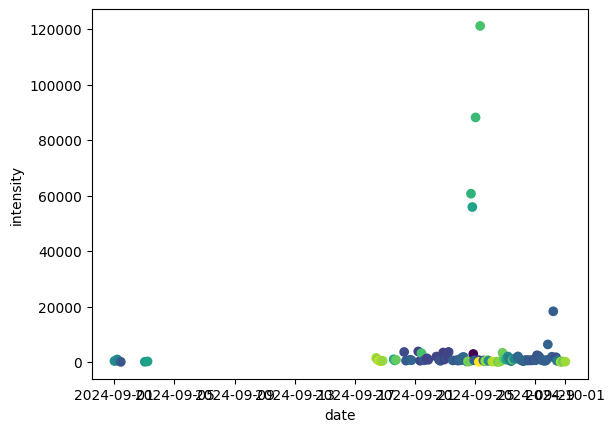

In [11]:
fig, ax = plt.subplots()

ax.scatter(x=df['datetime'], y=df['area'], c=df['RT'])
ax.set_ylabel('intensity')  # Add a y-label to the axes.
ax.set_xlabel('date')  # Add a x-label to the axes.

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('RT')

plt.xticks(rotation=45)

fig.savefig(f'{filename}.png')

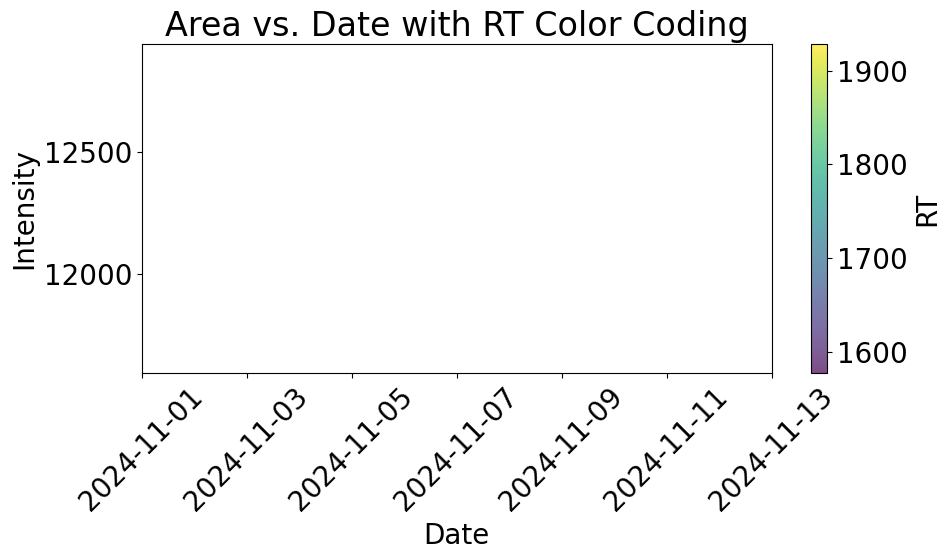

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=df['datetime'], y=df['area'], c=df['RT'], cmap='viridis', alpha=0.7)
ax.set_ylabel('Intensity')  # Add a y-label to the axes.
ax.set_xlabel('Date')  # Add a x-label to the axes.

# Set x-axis limits
start_date = pd.to_datetime('2024-11-01')
end_date = pd.to_datetime('2024-11-13')
ax.set_xlim(start_date, end_date)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('RT')

plt.xticks(rotation=45)
plt.title('Area vs. Date with RT Color Coding')
plt.tight_layout()
plt.show()

fig.savefig(f'{filename}.png')

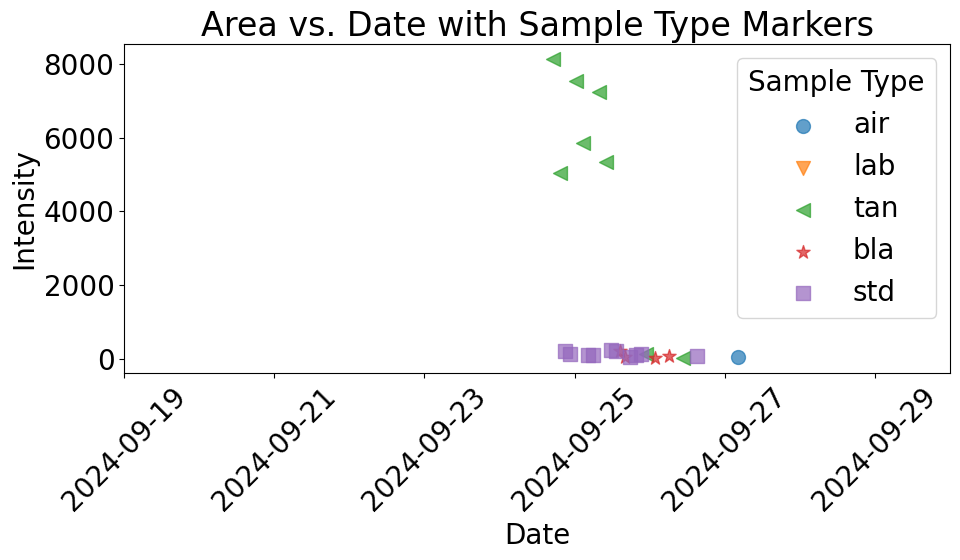

In [27]:

sample_to_marker = {'air': 'o', 'lab': 'v', 'tan': '<', 'bla':'*', 'std':'s'}
df['sample_marker'] = df['sampletype'].map(sample_to_marker)


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each sample type separately
for sample, marker in sample_to_marker.items():
    subset = df[df['sampletype'] == sample]
    ax.scatter(subset['datetime'], subset['area'], label=sample, marker=marker, alpha=0.7, s=100)

ax.set_ylabel('Intensity')
ax.set_xlabel('Date')

# Set x-axis limits
start_date = pd.to_datetime('2024-09-19')
end_date = pd.to_datetime('2024-09-30')
ax.set_xlim(start_date, end_date)


plt.xticks(rotation=45)
plt.title('Area vs. Date with Sample Type Markers')
plt.legend(title='Sample Type')
plt.tight_layout()



fig.savefig(f'{filename}_bytype.png')
plt.show()


In [20]:
# add a second file to plot data against

file2 = r"C:\Users\lab134\Documents\Data\Alpinac\ExtractionManyFiles\export_2410_chloroethene.txt"

# attempting to extract filename
file2name = os.path.splitext(os.path.basename(file2))[0]

df2 = pd.read_csv(file2, sep="\s+")

# Add some useful columns
df2['datetime'] = pd.to_datetime(df2['File'].str.slice(0,11), format="%y%m%d.%H%M")
df2['sampletype'] = df2['File'].str.slice(12,15)
df2['unit_mass'] = df2['mass'].round(0).astype(int)

#merge second file with first one in a table to plot afterwards
merged_df = pd.merge(df, df2, on='datetime', how='left', suffixes=('_1', '_2'))

merged_df.head()

File_1     RT_1     mass_1  mass_u_ppm_1  mass_cal_u_ppm_1  \
0  241001.0123.tank.9  1477.68  59.976550         14.51             16.67   
1   241001.0553.std.7  1477.79  59.934255         71.59             50.00   
2   241001.0803.std.7  1477.66  59.941728         41.61             50.00   
3   241001.1223.air.1  1477.58  59.913298         21.13             50.00   
4   241001.1643.air.1  1477.45  59.913368         24.51             50.00   

    area_1  area_u_1  peak_width_1  peak_alpha_1  compound_bin_1  ...  \
0  1355.95     27.40       0.00846         0.332              -1  ...   
1    76.74      7.15       0.00944         0.395              -1  ...   
2   193.94     12.62       0.00912         0.457              -1  ...   
3   677.91     39.30       0.00850         0.306              -1  ...   
4   682.62     25.38       0.00872         0.332              -1  ...   

   peak_width_2  peak_alpha_2 compound_bin_2  LOD_2   SN_2 Ionisation_2  \
0       0.00558         0.010             -1  22.86   2.48           EI   
1       0.00792         0.261             -1  44.45   6.18           EI   
2       0.00757         0.431             -1  69.42  10.01           EI   
3       0.00887         0.713             -1  33.04  13.82           EI   
4       0.00770         0.271             -1  22.19  20.01           EI   

  Adduct_2  Spectrum_id_2 sampletype_2 unit_mass_2  
0      NaN              0          tan          62  
1      NaN              0          std          62  
2      NaN              0          std          62  
3      NaN              0          air          62  
4      NaN              0          air          62  

[5 rows x 36 columns]

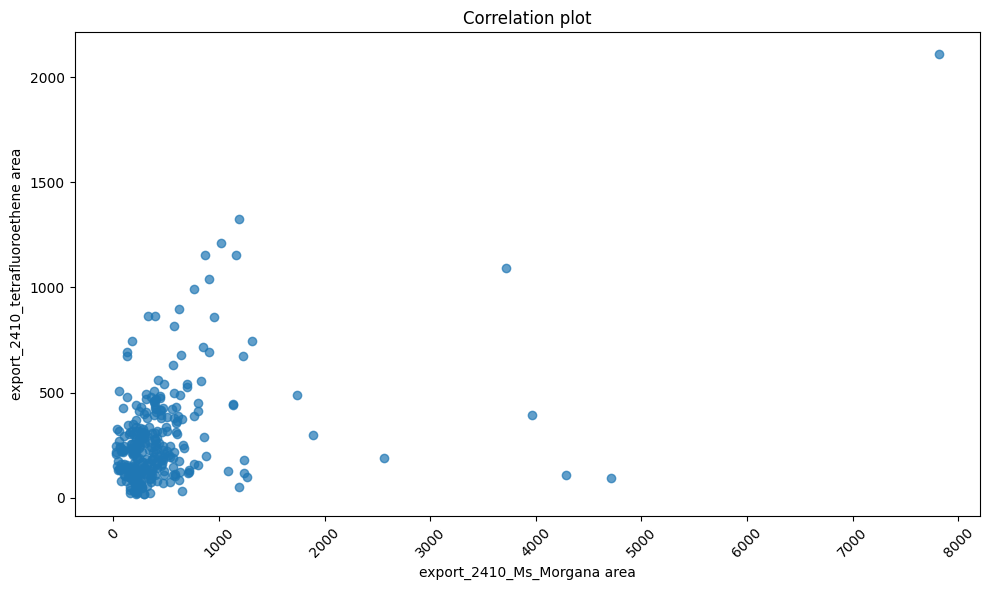

In [150]:
# plot intensities of file1 against intensities of file2

fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(x=merged_df['area_1'], y=merged_df['area_2'], alpha=0.7)
ax.set_ylabel(f'{file2name} area')  # Add a y-label to the axes.
ax.set_xlabel(f'{filename} area')  # Add a x-label to the axes.


plt.xticks(rotation=45)
plt.title('Correlation plot')
plt.tight_layout()
plt.show()


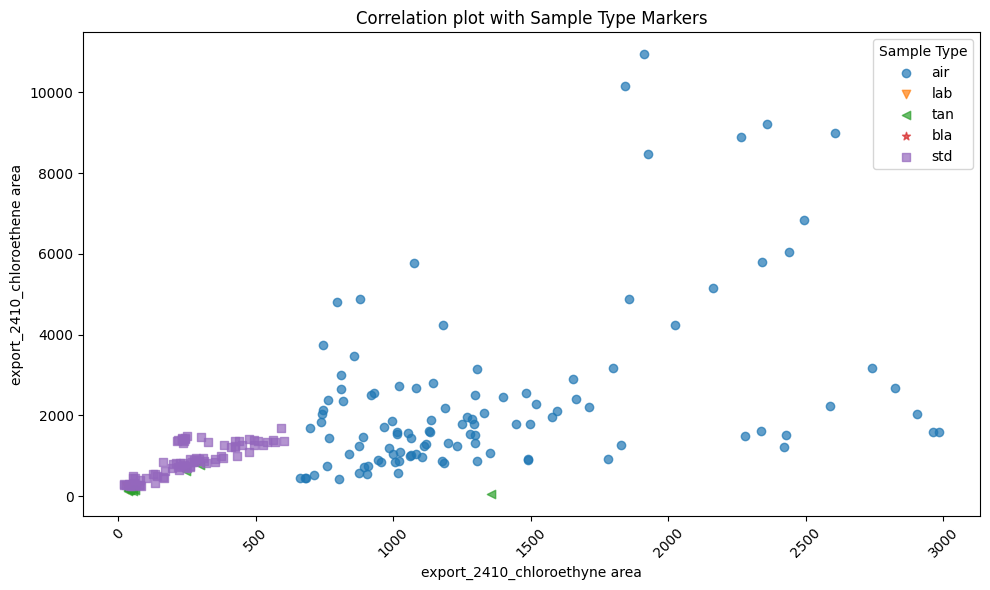

In [21]:
# plot intensities of file1 against intensities of file2


sample_to_marker = {'air': 'o', 'lab': 'v', 'tan': '<', 'bla':'*', 'std':'s'}
merged_df['sample_marker'] = merged_df['sampletype_1'].map(sample_to_marker)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each sample type separately
for sample, marker in sample_to_marker.items():
    subset = merged_df[merged_df['sampletype_1'] == sample]
    ax.scatter(subset['area_1'], subset['area_2'], label=sample, marker=marker, alpha=0.7)

ax.set_ylabel(f'{file2name} area')
ax.set_xlabel(f'{filename} area')


plt.xticks(rotation=45)
plt.title('Correlation plot with Sample Type Markers')
plt.legend(title='Sample Type')
plt.tight_layout()


In [142]:
#trying to extract date and name seperately from filename

parts = filename.split('_')[1]
date = parts[1]  # YYMM part
sample_name = parts[2]  # name part

print(f"Date: {date}")
print(f"Sample Name: {sample_name}")


Date: 2410
Sample Name: Ms
